In [6]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [7]:
from keras.models import Sequential, load_model
from keras.datasets import cifar10
from keras.utils import np_utils,plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import metrics

In [8]:
(x_train_image, y_train_label), (x_test_image, y_test_label)=cifar10.load_data() 

In [34]:
label={
    0:"airplain",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck"}

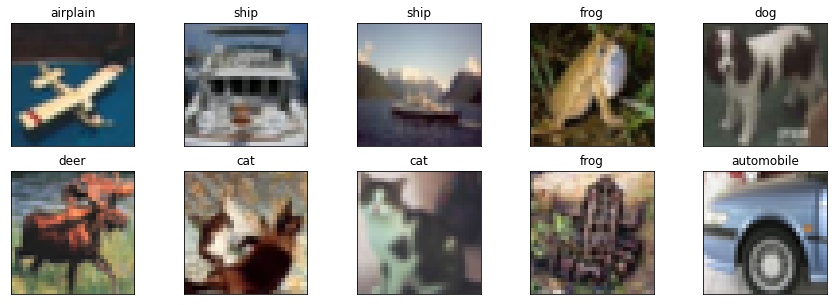

In [10]:
fig=plt.gcf()
fig.set_size_inches(15, 5)
for i in range(0,10):
    ax=plt.subplot(2,5,i+1)
    x=np.random.randint(50000)
    ax.imshow(x_train_image[x])
    t=y_train_label[x][0]
    title=label[t]
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [11]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [12]:
model2 = Sequential()
model2.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model2.add(MaxPool2D(pool_size=2))

model2.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model2.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model2.add(MaxPool2D(pool_size=2))

model2.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model2.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model2.add(MaxPool2D(pool_size=2))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(rate=0.25))
model2.add(Dense(10, activation='softmax'))

In [13]:
(x_train_image, y_train_label), (x_test_image, y_test_label)=cifar10.load_data() 
x_train_image = x_train_image.astype('float32')/255
x_test_image = x_test_image.astype('float32')/255
y_train_label = np_utils.to_categorical(y_train_label)
y_test_label = np_utils.to_categorical(y_test_label)

In [14]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model2.fit(x_train_image, y_train_label, epochs=30, batch_size=50, verbose=1)

Epoch 1/30


KeyboardInterrupt: 

In [ ]:
model2.save('first_model.h5')

In [26]:
hist_df = pd.DataFrame(history.history)
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [27]:
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

In [16]:
print("hyperparameters:")
print("batch size: 64")
print('learning rate: '+'0.001')
print("optimizer: "+'adam')

hyperparameters:
batch size: 64
learning rate: 0.001
optimizer: adam


In [18]:
loss, accuracy = model2.evaluate(x_test_image, y_test_label)
print('Test:')
print('Loss:', loss)
print('Accuracy:', accuracy)

313/313 [==============================] - 25s 81ms/step - loss: 1.3265 - accuracy: 0.7746
Test:
Loss: 1.326491117477417
Accuracy: 0.7746000289916992


In [44]:
df = pd.read_json('history.json')

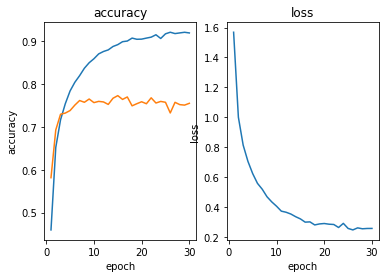

In [46]:
df = pd.read_json('history.json')
epoch_range = range(1, 31)
plt.subplot(1, 2, 1)
plt.plot(epoch_range, df['accuracy'])
plt.plot(epoch_range, df['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, df['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [47]:
model = load_model('model.h5')

In [28]:
loss, accuracy = model.evaluate(x_test_image, y_test_label)
print('Test:')
print('Loss:', loss)
print('Accuracy:', accuracy)

313/313 [==============================] - 25s 79ms/step - loss: 2.3635 - accuracy: 0.1000
Test:
Loss: 2.363542079925537
Accuracy: 0.10000000149011612


In [48]:
prediction=model.predict(x_test_image)

In [37]:
print(label)
label2=['airplain','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

{0: 'airplain', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [ ]:
prediction=model.predict(x_test_image[0])

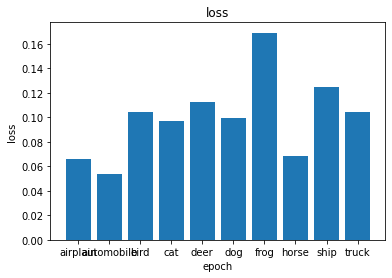

In [39]:
plt.bar(label2, prediction)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

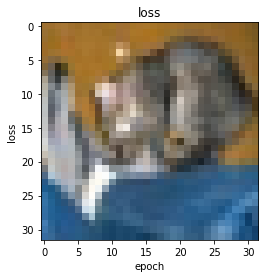

In [40]:
plt.imshow(x_test_image[])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [41]:
print(y_test_label[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
